# Linear Operators

Finite dimensional linear operators allow matrix algebra without explicitly constructing a full representation. Instead it suffices to define a matrix-vector product and a shape attribute. This avoids unnecessary memory usage and can often be more convenient to derive.

## Sparse Arrays

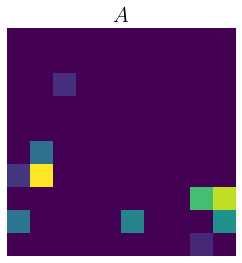

In [1]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True
# Imports
import numpy as np
import scipy.sparse
from probnum.linalg.linear_operators import MatrixMult, Identity

# Linear operator from sparse matrix
n = 10
mat = scipy.sparse.rand(m=n, n=n, density=0.1)
A = MatrixMult(A=mat)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.imshow(A.todense())
axes.set_axis_off()
axes.title.set_text('$A$')
fig.tight_layout()

## Basic Arithmetic

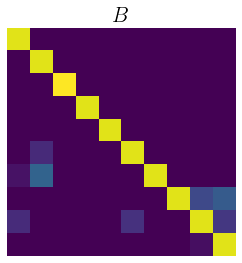

In [7]:
# Linear operator arithmetic
Id = Identity(shape=n)
B = MatrixMult(A=mat) + 3 * Id

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.imshow(B.todense())
axes.set_axis_off()
axes.title.set_text('$B$')
fig.tight_layout()

## The Kronecker Product

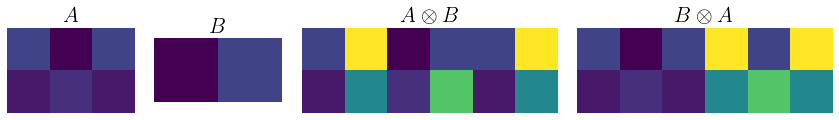

In [3]:
from probnum.linalg.linear_operators import Kronecker, SymmetricKronecker

# Kronecker Product
A = np.array([[4, 1, 4], 
              [2, 3, 2]])
B = np.array([[1, 4]])
W = Kronecker(A, B)
V = Kronecker(B, A)

# TODO: declare a plotting function and reuse for Symmetric Kronecker product
# Heatmap scale
W_dense = W.todense()
V_dense = V.todense()
vmin = np.min([np.min(mat) for mat in [A, B, W_dense, V_dense]])
vmax = np.max([np.max(mat) for mat in [A, B, W_dense, V_dense]])

# Plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), gridspec_kw={'width_ratios': [1, 1, 2, 2]})
axes[0].imshow(A, vmin=vmin, vmax=vmax)
axes[0].set_axis_off()
axes[0].title.set_text('$A$')
axes[1].imshow(B, vmin=vmin, vmax=vmax)
axes[1].set_axis_off()
axes[1].title.set_text('$B$')
axes[2].imshow(W_dense, vmin=vmin, vmax=vmax)
axes[2].set_axis_off()
axes[2].title.set_text('$A \otimes B$')
axes[3].imshow(V_dense, vmin=vmin, vmax=vmax)
axes[3].set_axis_off()
axes[3].title.set_text('$B \otimes A$')
fig.tight_layout()

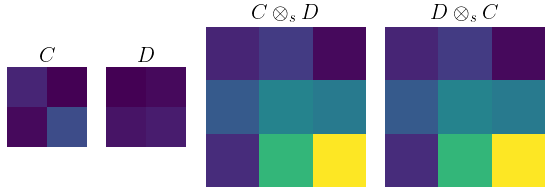

In [4]:
# Symmetric Kronecker Product
C = np.array([[5, 1], 
              [2, 10]])
D = np.array([[1, 2], 
              [3, 4]])
Ws = SymmetricKronecker(C, D)
Vs = SymmetricKronecker(D, C)

# Heatmap scale
Ws_dense = Ws.todense()
Vs_dense = Vs.todense()
vmin = np.min([np.min(mat) for mat in [C, D, Ws_dense, Vs_dense]])
vmax = np.max([np.max(mat) for mat in [C, D, Ws_dense, Vs_dense]])

# Plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), gridspec_kw={'width_ratios': [1, 1, 2, 2]})
axes[0].imshow(C, vmin=vmin, vmax=vmax)
axes[0].set_axis_off()
axes[0].title.set_text('$C$')
axes[1].imshow(D, vmin=vmin, vmax=vmax)
axes[1].set_axis_off()
axes[1].title.set_text('$D$')
axes[2].imshow(Ws_dense, vmin=vmin, vmax=vmax)
axes[2].set_axis_off()
axes[2].title.set_text('$C \otimes_s D$')
axes[3].imshow(Vs_dense, vmin=vmin, vmax=vmax)
axes[3].set_axis_off()
axes[3].title.set_text('$D \otimes_s C$')
fig.tight_layout()

Note, that the symmetric Kronecker product generally does **not** have a **symmetric** matrix representation. It is the case if its arguments are symmetric. But, as we can see above its arguments commute.

## Linear Operators and Linear Solvers

Many methods implemented in `probnum.linalg` can also take `LinearOperators` as inputs.